In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from tqdm import tqdm

# import dataset 1

In [4]:
data1 = pd.read_csv('../1_owid/owid-covid-data.csv')
data1 = data1[data1.continent == 'Europe']

In [5]:
data1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

In [6]:
data1 = data1[['iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases_smoothed', 'total_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_smoothed_per_million',
       'total_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients_per_million', 
       'hosp_patients_per_million', 
       'weekly_icu_admissions_per_million', 
       'weekly_hosp_admissions_per_million',
       'total_tests_per_thousand','new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]

In [7]:
data1.iso_code.nunique()

46

In [8]:
print('Number of European countries in dataset 1:', len(data1.location.unique()))

Number of European countries in dataset 1: 46


In [9]:
data1.iso_code.unique()

array(['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP',
       'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL',
       'IRL', 'ITA', 'OWID_KOS', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA',
       'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS',
       'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR',
       'VAT'], dtype=object)

In [10]:
# replace 'OWID_KOS' with 'KOS'
data1.iso_code = data1.iso_code.str.replace('OWID_KOS', 'KOS')

In [11]:
iso_codes = data1.iso_code.unique()

In [12]:
locations = data1.location.unique()

### create dictionary to convert iso to location back and forth

In [13]:
code_to_location = dict(zip(iso_codes, locations))
tuple(code_to_location.items())

(('ALB', 'Albania'),
 ('AND', 'Andorra'),
 ('AUT', 'Austria'),
 ('BLR', 'Belarus'),
 ('BEL', 'Belgium'),
 ('BIH', 'Bosnia and Herzegovina'),
 ('BGR', 'Bulgaria'),
 ('HRV', 'Croatia'),
 ('CYP', 'Cyprus'),
 ('CZE', 'Czechia'),
 ('DNK', 'Denmark'),
 ('EST', 'Estonia'),
 ('FIN', 'Finland'),
 ('FRA', 'France'),
 ('DEU', 'Germany'),
 ('GRC', 'Greece'),
 ('HUN', 'Hungary'),
 ('ISL', 'Iceland'),
 ('IRL', 'Ireland'),
 ('ITA', 'Italy'),
 ('KOS', 'Kosovo'),
 ('LVA', 'Latvia'),
 ('LIE', 'Liechtenstein'),
 ('LTU', 'Lithuania'),
 ('LUX', 'Luxembourg'),
 ('MLT', 'Malta'),
 ('MDA', 'Moldova'),
 ('MCO', 'Monaco'),
 ('MNE', 'Montenegro'),
 ('NLD', 'Netherlands'),
 ('MKD', 'North Macedonia'),
 ('NOR', 'Norway'),
 ('POL', 'Poland'),
 ('PRT', 'Portugal'),
 ('ROU', 'Romania'),
 ('RUS', 'Russia'),
 ('SMR', 'San Marino'),
 ('SRB', 'Serbia'),
 ('SVK', 'Slovakia'),
 ('SVN', 'Slovenia'),
 ('ESP', 'Spain'),
 ('SWE', 'Sweden'),
 ('CHE', 'Switzerland'),
 ('UKR', 'Ukraine'),
 ('GBR', 'United Kingdom'),
 ('VAT', 'Vat

In [14]:
location_to_code = dict(zip(locations, iso_codes))
tuple(location_to_code.items())

(('Albania', 'ALB'),
 ('Andorra', 'AND'),
 ('Austria', 'AUT'),
 ('Belarus', 'BLR'),
 ('Belgium', 'BEL'),
 ('Bosnia and Herzegovina', 'BIH'),
 ('Bulgaria', 'BGR'),
 ('Croatia', 'HRV'),
 ('Cyprus', 'CYP'),
 ('Czechia', 'CZE'),
 ('Denmark', 'DNK'),
 ('Estonia', 'EST'),
 ('Finland', 'FIN'),
 ('France', 'FRA'),
 ('Germany', 'DEU'),
 ('Greece', 'GRC'),
 ('Hungary', 'HUN'),
 ('Iceland', 'ISL'),
 ('Ireland', 'IRL'),
 ('Italy', 'ITA'),
 ('Kosovo', 'KOS'),
 ('Latvia', 'LVA'),
 ('Liechtenstein', 'LIE'),
 ('Lithuania', 'LTU'),
 ('Luxembourg', 'LUX'),
 ('Malta', 'MLT'),
 ('Moldova', 'MDA'),
 ('Monaco', 'MCO'),
 ('Montenegro', 'MNE'),
 ('Netherlands', 'NLD'),
 ('North Macedonia', 'MKD'),
 ('Norway', 'NOR'),
 ('Poland', 'POL'),
 ('Portugal', 'PRT'),
 ('Romania', 'ROU'),
 ('Russia', 'RUS'),
 ('San Marino', 'SMR'),
 ('Serbia', 'SRB'),
 ('Slovakia', 'SVK'),
 ('Slovenia', 'SVN'),
 ('Spain', 'ESP'),
 ('Sweden', 'SWE'),
 ('Switzerland', 'CHE'),
 ('Ukraine', 'UKR'),
 ('United Kingdom', 'GBR'),
 ('Vatican', 

In [15]:
location_to_code['Kosovo']

'KOS'

In [16]:
data1.date = pd.to_datetime(data1.date)

In [17]:
data1.set_index('date', inplace=True)

# some time series plots

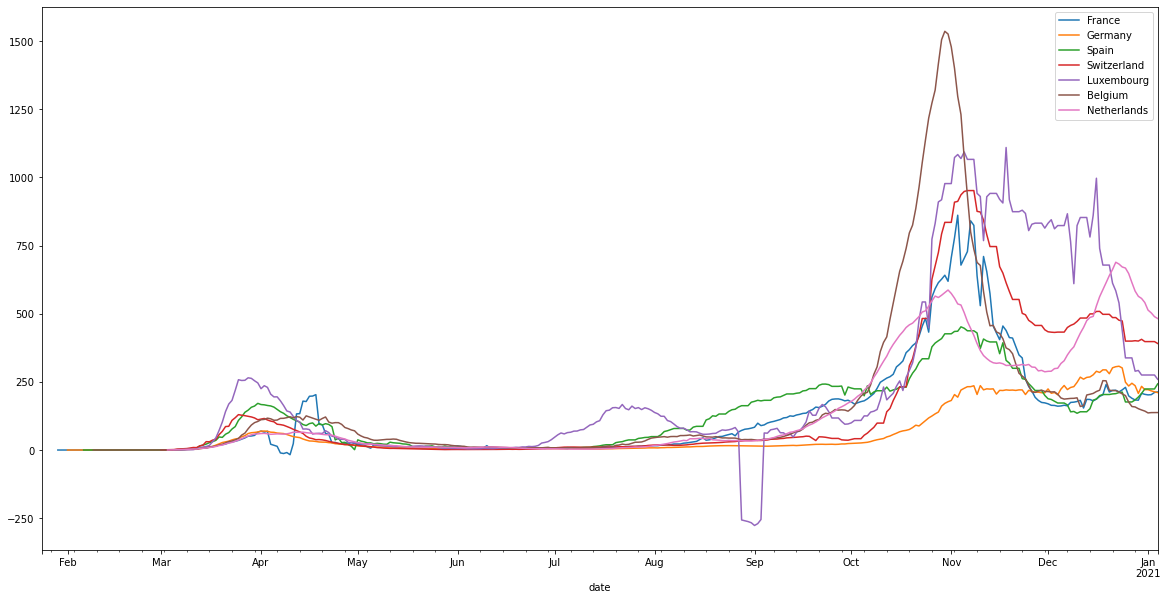

In [18]:
plt.figure(figsize=(20,10))
countries = ['France','Germany','Spain','Switzerland','Luxembourg','Belgium','Netherlands']
for c in countries:
    data1[data1.location == c]['new_cases_smoothed_per_million'].plot()

plt.legend(countries)

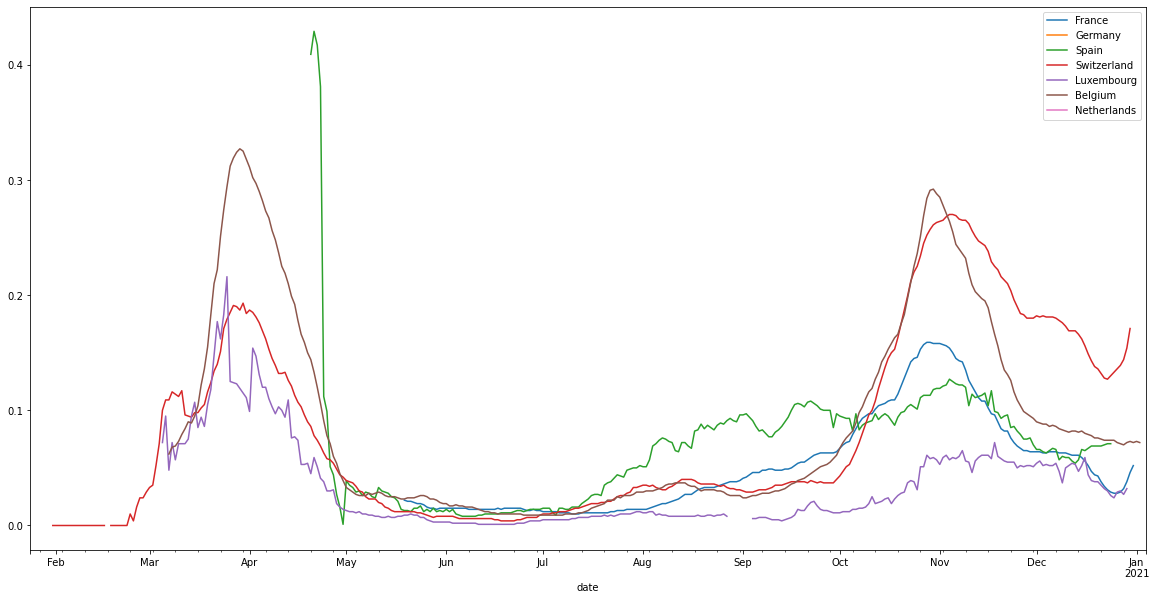

In [19]:
plt.figure(figsize=(20,10))
for c in countries:
    data1[data1.location == c]['positive_rate'].plot()

plt.legend(countries)

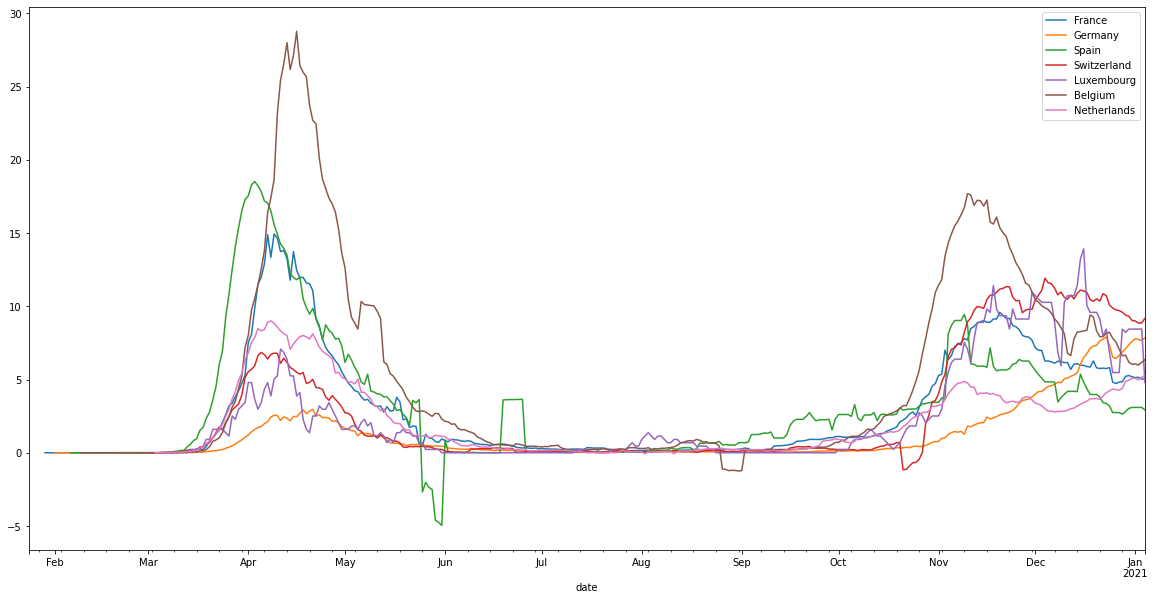

In [20]:
plt.figure(figsize=(20,10))
for c in countries:
    data1[data1.location == c]['new_deaths_smoothed_per_million'].plot()

plt.legend(countries)

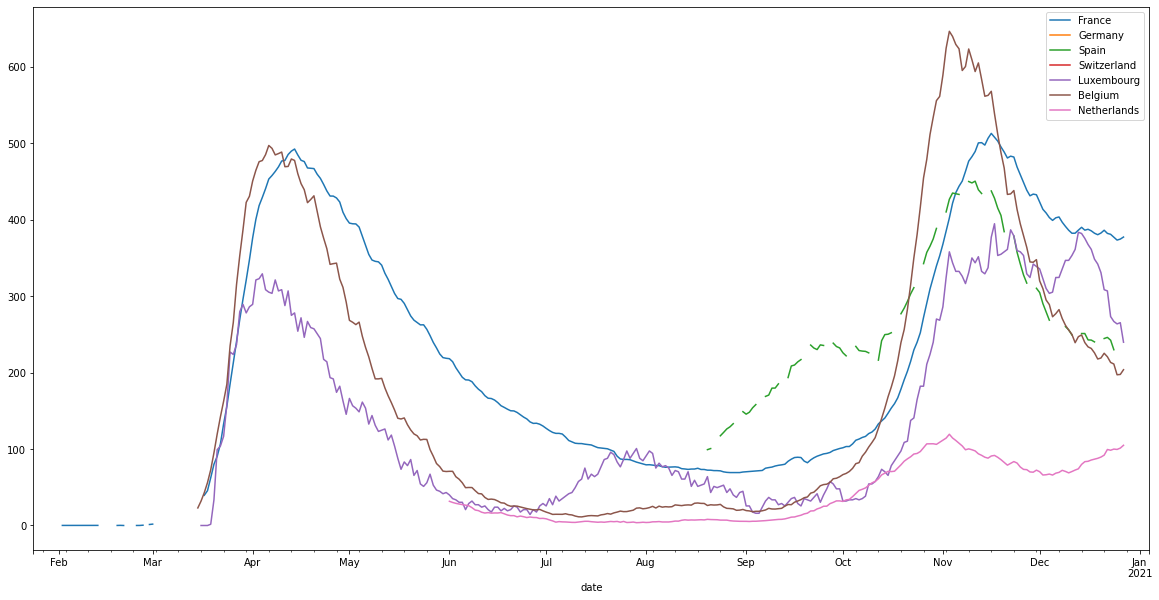

In [21]:
plt.figure(figsize=(20,10))
for c in countries:
    data1[data1.location == c]['hosp_patients_per_million'].plot()

plt.legend(countries)

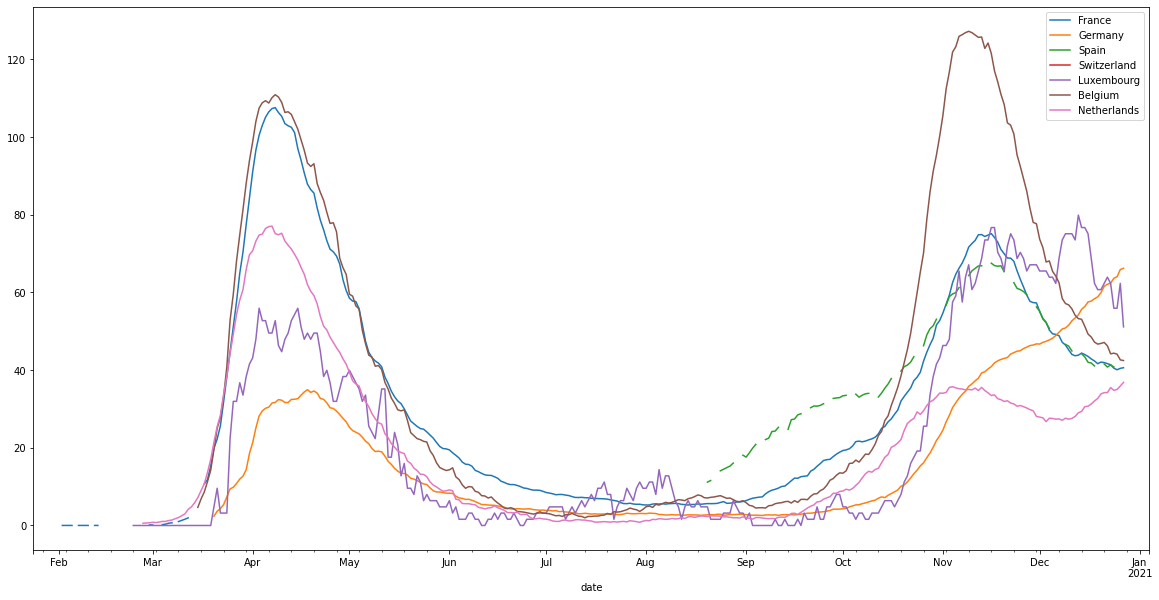

In [22]:
plt.figure(figsize=(20,10))
for c in countries:
    data1[data1.location == c]['icu_patients_per_million'].plot()

plt.legend(countries)

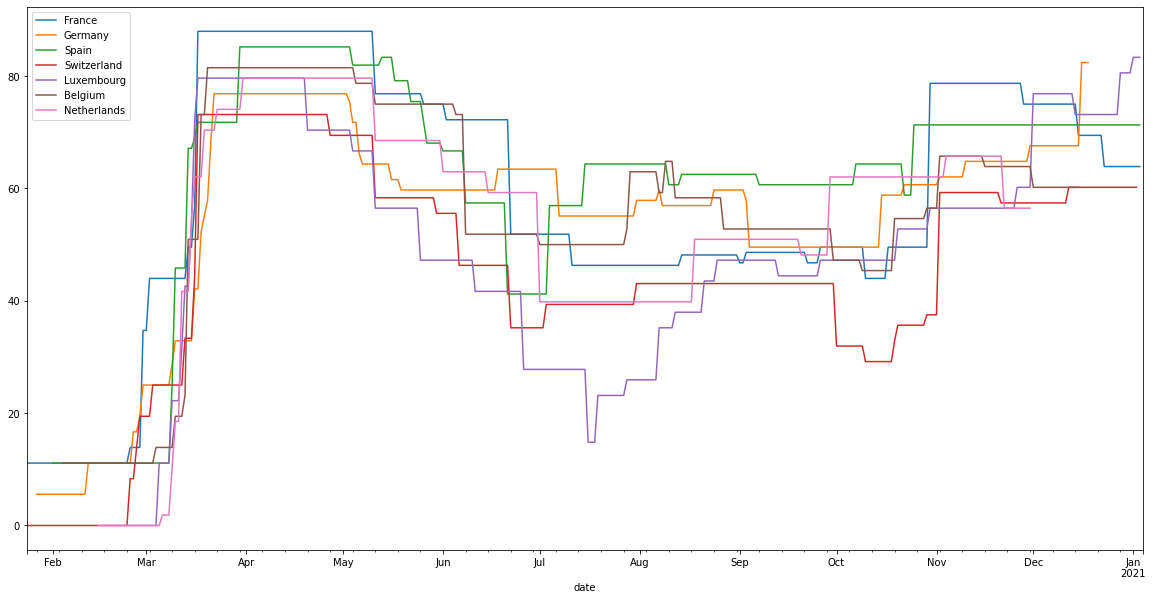

In [23]:
plt.figure(figsize=(20,10))
for c in countries:
    data1[data1.location == c]['stringency_index'].plot()

plt.legend(countries)

# North

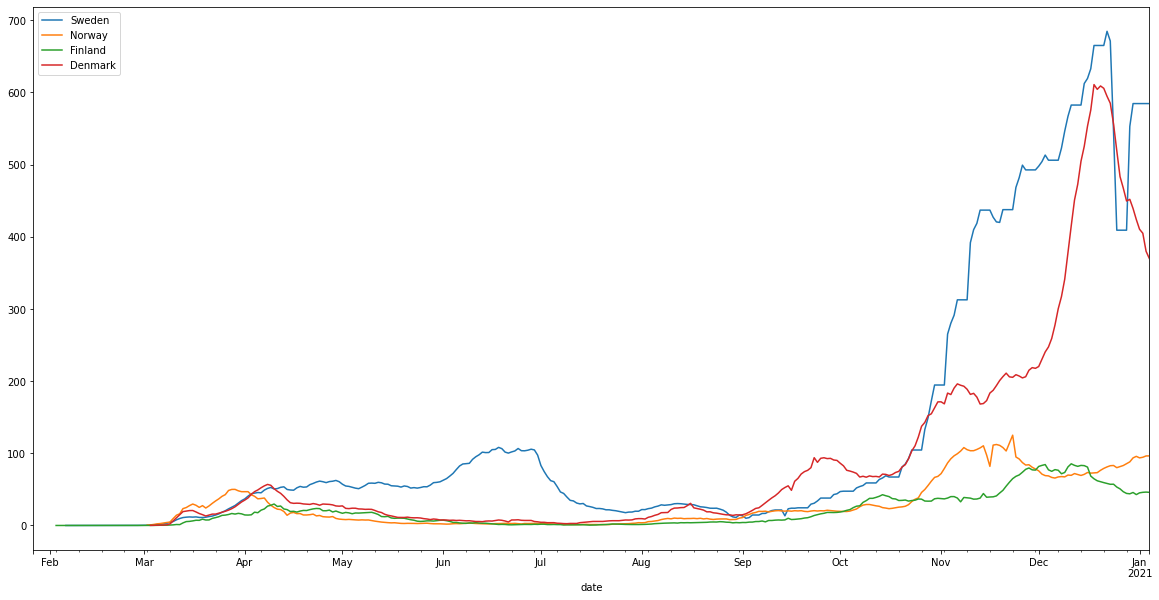

In [24]:
plt.figure(figsize=(20,10))
countries = ['Sweden','Norway','Finland','Denmark']
for c in countries:
    data1[data1.location == c]['new_cases_smoothed_per_million'].plot()

plt.legend(countries)

# unstack the data from long to wide form

In [25]:
# data1_cases = data1[['location','new_cases_smoothed_per_million']].reset_index().set_index(['date','location']).unstack()
data1_cases = data1.reset_index().set_index(['date','iso_code']).unstack()

# Correlation after removing cross-sectional mean

In [26]:
cross_section_mean = data1_cases['new_cases_smoothed_per_million'].mean(axis=1)

In [27]:
data1_case_demean = data1_cases['new_cases_smoothed_per_million'].subtract(cross_section_mean, axis='rows')

In [28]:
data1_case_demean_corr_iso = data1_case_demean.corr()
data1_case_demean_corr_iso

iso_code       ALB       AND       AUT       BEL       BGR       BIH  \
iso_code                                                               
ALB       1.000000 -0.718613 -0.387713 -0.490862  0.282370  0.376105   
AND      -0.718613  1.000000  0.205350  0.671471 -0.327040 -0.193659   
AUT      -0.387713  0.205350  1.000000  0.052124  0.659819  0.339625   
BEL      -0.490862  0.671471  0.052124  1.000000 -0.207244  0.265628   
BGR       0.282370 -0.327040  0.659819 -0.207244  1.000000  0.659931   
BIH       0.376105 -0.193659  0.339625  0.265628  0.659931  1.000000   
BLR       0.897349 -0.720721 -0.481220 -0.380923  0.110109  0.240777   
CHE      -0.849515  0.504476  0.549963  0.572715  0.043932  0.055826   
CYP       0.423124 -0.608004 -0.616474 -0.626982 -0.367059 -0.433528   
CZE      -0.810182  0.769732  0.029127  0.747013 -0.532364 -0.221669   
DEU       0.899647 -0.792579 -0.459189 -0.466346  0.098134  0.230931   
DNK       0.492651 -0.622203 -0.690941 -0.585203 -0.380146 -0.375735   
ESP       0.370317  0.097530 -0.057069  0.330009 -0.038388  0.530274   
EST       0.721947 -0.776584 -0.585868 -0.760141 -0.158311 -0.241645   
FIN       0.923134 -0.605233 -0.425401 -0.266602  0.146110  0.393527   
FRA      -0.278021  0.477771  0.246970  0.781233 -0.027576  0.494070   
GBR      -0.020318 -0.046014 -0.498553 -0.091011 -0.745567 -0.508974   
GRC       0.888098 -0.605759 -0.104669 -0.266653  0.422127  0.596636   
HRV      -0.433648  0.123035  0.350912 -0.161655  0.299121 -0.219781   
HUN       0.040773 -0.133299  0.536772 -0.400223  0.726810  0.176529   
IRL       0.687429 -0.363918 -0.577131 -0.059768 -0.242029  0.143130   
ISL       0.696855 -0.223838 -0.421093  0.048330 -0.052441  0.327877   
ITA      -0.200455 -0.023413  0.887215  0.055929  0.696465  0.411751   
KOS       0.804495 -0.684979  0.140744 -0.472671  0.704735  0.640056   
LIE      -0.780444  0.278889  0.169953  0.152467 -0.387168 -0.464198   
LTU      -0.345266 -0.122328 -0.040961 -0.492061 -0.215779 -0.660531   
LUX      -0.720595  0.439789  0.605659  0.312239  0.277278 -0.010636   
LVA       0.626632 -0.729006 -0.645036 -0.716696 -0.256584 -0.320127   
MCO       0.556690 -0.452183 -0.334221 -0.103519 -0.162628  0.291339   
MDA       0.915429 -0.518463 -0.383224 -0.442283  0.238635  0.338580   
MKD       0.144387 -0.202108  0.666598 -0.213826  0.906274  0.558488   
MLT       0.724666 -0.208678 -0.282989  0.003355  0.081096  0.486660   
MNE      -0.542340  0.395932  0.564926 -0.142358  0.156838 -0.178930   
NLD      -0.466474  0.475691 -0.529571  0.415000 -0.851879 -0.545490   
NOR       0.901481 -0.615614 -0.360182 -0.262405  0.155592  0.417304   
POL      -0.369495  0.184716  0.923303  0.236679  0.653791  0.470767   
PRT      -0.242424 -0.056094  0.742274 -0.329892  0.505678 -0.051204   
ROU       0.596298 -0.348515  0.397975 -0.273512  0.804988  0.719868   
RUS       0.933468 -0.678822 -0.470502 -0.345744  0.130130  0.340421   
SMR      -0.406827 -0.099745  0.200287 -0.311938 -0.049972 -0.537302   
SRB      -0.092401 -0.210709  0.143846 -0.577761  0.283037 -0.359877   
SVK      -0.227431  0.070469 -0.641932  0.205515 -0.777543 -0.433826   
SVN      -0.829980  0.467599  0.287340  0.262485 -0.142179 -0.378052   
SWE       0.102512 -0.527803 -0.128453 -0.746453  0.010848 -0.504103   
UKR       0.964906 -0.625744 -0.306271 -0.479401  0.330051  0.391988   
VAT       0.167171  0.172700 -0.346675  0.156754 -0.272860 -0.108185   

iso_code       BLR       CHE       CYP       CZE  ...       PRT       ROU  \
iso_code                                          ...                       
ALB       0.897349 -0.849515  0.423124 -0.810182  ... -0.242424  0.596298   
AND      -0.720721  0.504476 -0.608004  0.769732  ... -0.056094 -0.348515   
AUT      -0.481220  0.549963 -0.616474  0.029127  ...  0.742274  0.397975   
BEL      -0.380923  0.572715 -0.626982  0.747013  ... -0.329892 -0.273512   
BGR       0.110109  0.043932 -0.367059 -0.532364  ...  0.505678  0.804988   
BIH 

### change iso to location

In [29]:
data1_case_demean_corr_loc = data1_case_demean_corr_iso.copy()
data1_case_demean_corr_loc.columns = [code_to_location[c] for c in data1_case_demean_corr_iso.columns]
data1_case_demean_corr_loc.index = [code_to_location[c] for c in data1_case_demean_corr_iso.columns]
data1_case_demean_corr_loc

Albania   Andorra   Austria   Belgium  Bulgaria  \
Albania                 1.000000 -0.718613 -0.387713 -0.490862  0.282370   
Andorra                -0.718613  1.000000  0.205350  0.671471 -0.327040   
Austria                -0.387713  0.205350  1.000000  0.052124  0.659819   
Belgium                -0.490862  0.671471  0.052124  1.000000 -0.207244   
Bulgaria                0.282370 -0.327040  0.659819 -0.207244  1.000000   
Bosnia and Herzegovina  0.376105 -0.193659  0.339625  0.265628  0.659931   
Belarus                 0.897349 -0.720721 -0.481220 -0.380923  0.110109   
Switzerland            -0.849515  0.504476  0.549963  0.572715  0.043932   
Cyprus                  0.423124 -0.608004 -0.616474 -0.626982 -0.367059   
Czechia                -0.810182  0.769732  0.029127  0.747013 -0.532364   
Germany                 0.899647 -0.792579 -0.459189 -0.466346  0.098134   
Denmark                 0.492651 -0.622203 -0.690941 -0.585203 -0.380146   
Spain                   0.370317  0.097530 -0.057069  0.330009 -0.038388   
Estonia                 0.721947 -0.776584 -0.585868 -0.760141 -0.158311   
Finland                 0.923134 -0.605233 -0.425401 -0.266602  0.146110   
France                 -0.278021  0.477771  0.246970  0.781233 -0.027576   
United Kingdom         -0.020318 -0.046014 -0.498553 -0.091011 -0.745567   
Greece                  0.888098 -0.605759 -0.104669 -0.266653  0.422127   
Croatia                -0.433648  0.123035  0.350912 -0.161655  0.299121   
Hungary                 0.040773 -0.133299  0.536772 -0.400223  0.726810   
Ireland                 0.687429 -0.363918 -0.577131 -0.059768 -0.242029   
Iceland                 0.696855 -0.223838 -0.421093  0.048330 -0.052441   
Italy                  -0.200455 -0.023413  0.887215  0.055929  0.696465   
Kosovo                  0.804495 -0.684979  0.140744 -0.472671  0.704735   
Liechtenstein          -0.780444  0.278889  0.169953  0.152467 -0.387168   
Lithuania              -0.345266 -0.122328 -0.040961 -0.492061 -0.215779   
Luxembourg             -0.720595  0.439789  0.605659  0.312239  0.277278   
Latvia                  0.626632 -0.729006 -0.645036 -0.716696 -0.256584   
Monaco                  0.556690 -0.452183 -0.334221 -0.103519 -0.162628   
Moldova                 0.915429 -0.518463 -0.383224 -0.442283  0.238635   
North Macedonia         0.144387 -0.202108  0.666598 -0.213826  0.906274   
Malta                   0.724666 -0.208678 -0.282989  0.003355  0.081096   
Montenegro             -0.542340  0.395932  0.564926 -0.142358  0.156838   
Netherlands            -0.466474  0.475691 -0.529571  0.415000 -0.851879   
Norway                  0.901481 -0.615614 -0.360182 -0.262405  0.155592   
Poland                 -0.369495  0.184716  0.923303  0.236679  0.653791   
Portugal               -0.242424 -0.056094  0.742274 -0.329892  0.505678   
Romania                 0.596298 -0.348515  0.397975 -0.273512  0.804988   
Russia                  0.933468 -0.678822 -0.470502 -0.345744  0.130130   
San Marino             -0.406827 -0.099745  0.200287 -0.311938 -0.049972   
Serbia                 -0.092401 -0.210709  0.143846 -0.577761  0.283037   
Slovakia               -0.227431  0.070469 -0.641932  0.205515 -0.777543   
Slovenia               -0.829980  0.467599  0.287340  0.262485 -0.142179   
Sweden                  0.102512 -0.527803 -0.128453 -0.746453  0.010848   
Ukraine                 0.964906 -0.625744 -0.306271 -0.479401  0.330051   
Vatican                 0.167171  0.172700 -0.346675  0.156754 -0.272860   

                        Bosnia and Herzegovina   Belarus  Switzerland  \
Albania                               0.376105  0.897349    -0.849515   
Andorra                              -0.193659 -0.720721     0.504476   
Austria                               0.339625 -0.481220     0.549963   
Belgium                               0.265628 -0.380923     0.572715   
Bulgaria                              0.659931  0.110109     0.043932   
Bosnia and Her

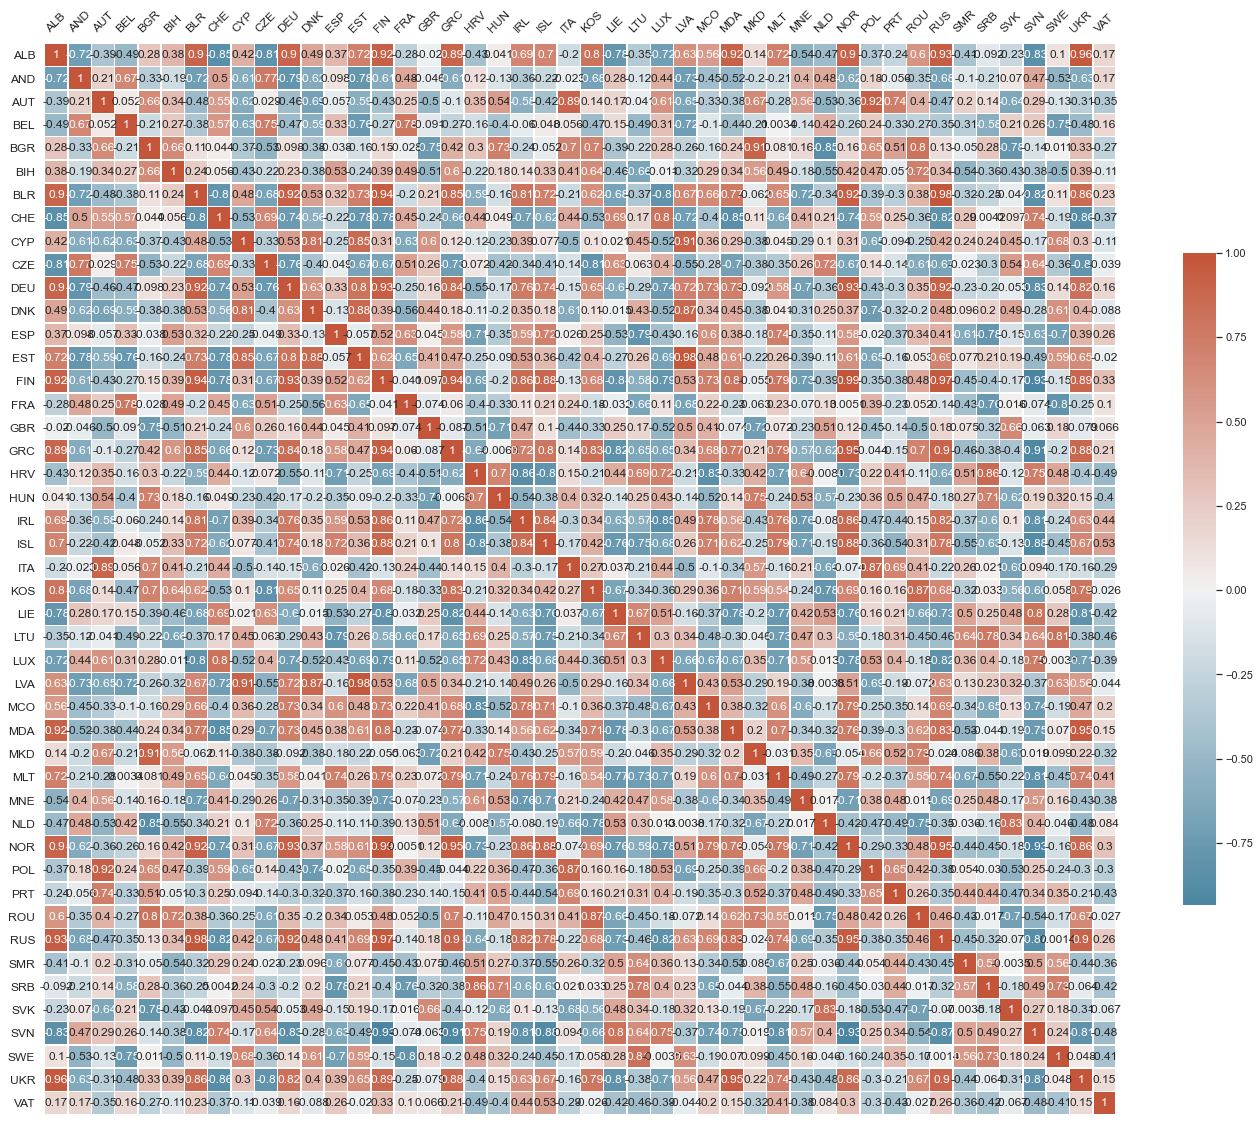

In [30]:
plt.figure(figsize=(24,24))
sns.set_theme(style='white')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
hm = sns.heatmap(data1_case_demean_corr_iso, square=True, cmap=cmap, center=0,
                annot=True, xticklabels=True, yticklabels=True, 
                cbar_kws={'shrink': 0.5}, cbar=True, linewidths=.5)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45) 
hm.set_yticklabels(hm.get_yticklabels(), rotation=0)
hm.set(xlabel=None, ylabel=None)
hm.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.show()

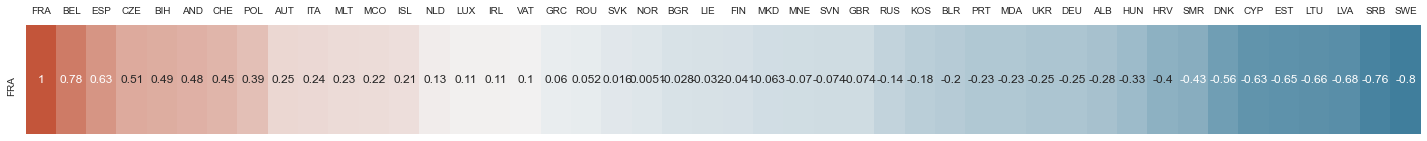

In [31]:
plt.figure(figsize=(25,2))
hm = sns.heatmap(data1_case_demean_corr_iso.loc[['FRA']].sort_values(by='FRA', axis=1, ascending=False), 
           annot=True, cmap=cmap, cbar=False)
hm.set(xlabel=None, ylabel=None)
hm.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

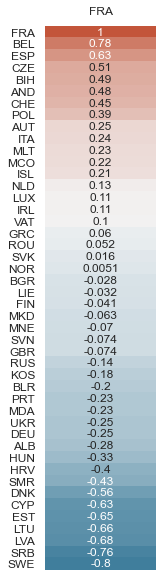

In [32]:
plt.figure(figsize=(2,10))
hm = sns.heatmap(data1_case_demean_corr_iso[['FRA']].sort_values('FRA', ascending=False), annot=True, cmap=cmap, cbar=False)
hm.set(xlabel=None, ylabel=None)
hm.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

In [33]:
location_to_code['Belarus']

'BLR'

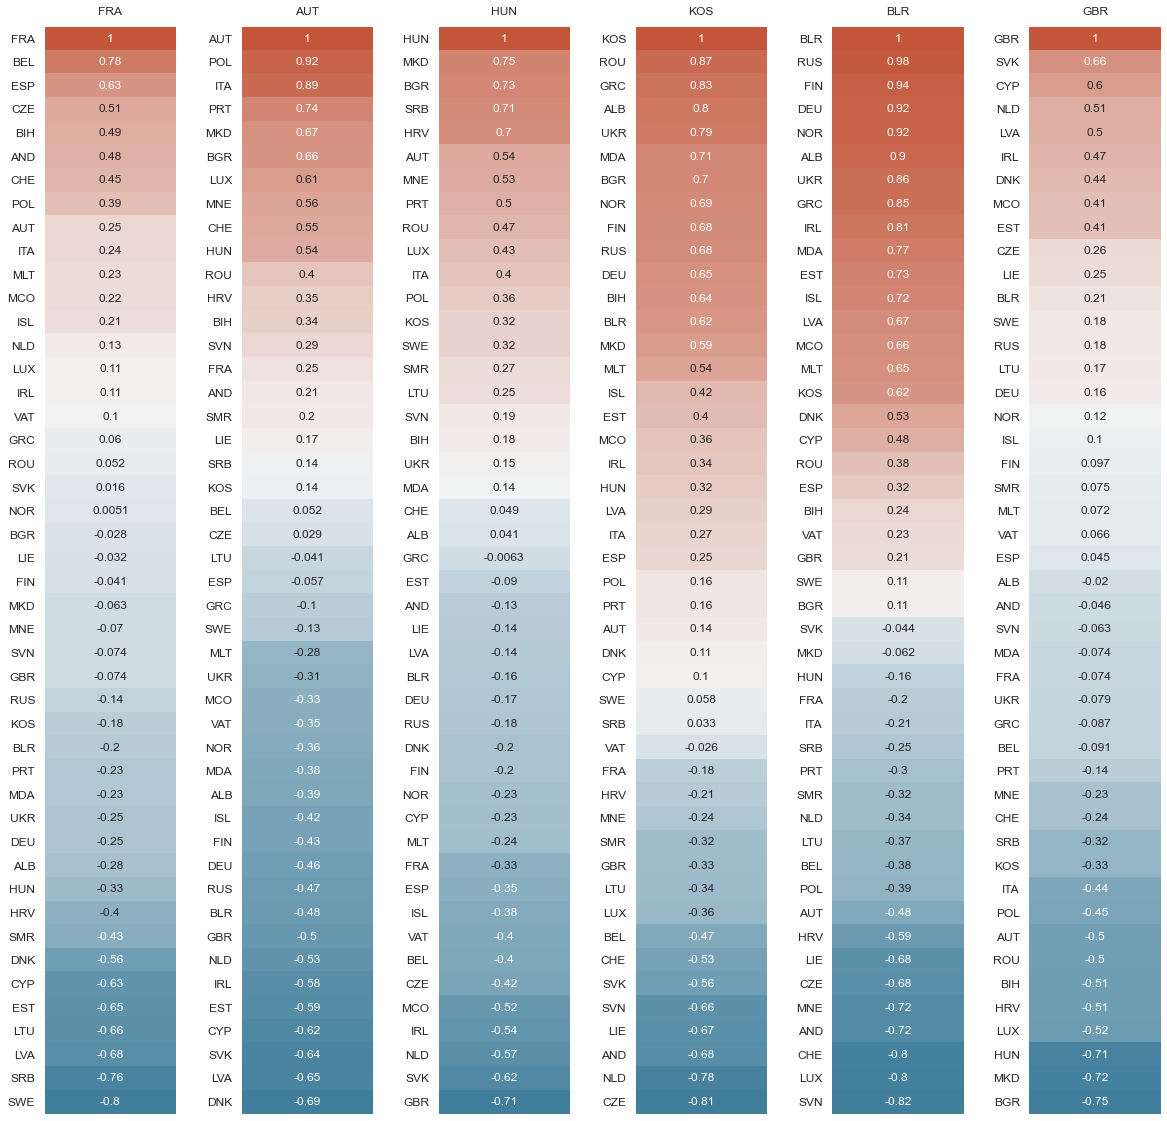

In [34]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(20,20))
#fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=0.5)
g1=sns.heatmap(data1_case_demean_corr_iso[['FRA']].sort_values('FRA',ascending=False), annot=True, ax=ax1, cmap=cmap, cbar=False)
g2=sns.heatmap(data1_case_demean_corr_iso[['AUT']].sort_values('AUT',ascending=False), annot=True, ax=ax2, cmap=cmap, cbar=False)
g3=sns.heatmap(data1_case_demean_corr_iso[['HUN']].sort_values('HUN',ascending=False), annot=True, ax=ax3, cmap=cmap, cbar=False)
g4=sns.heatmap(data1_case_demean_corr_iso[['KOS']].sort_values('KOS',ascending=False), annot=True, ax=ax4, cmap=cmap, cbar=False)
g5=sns.heatmap(data1_case_demean_corr_iso[['BLR']].sort_values('BLR',ascending=False), annot=True, ax=ax5, cmap=cmap, cbar=False)
g6=sns.heatmap(data1_case_demean_corr_iso[['GBR']].sort_values('GBR',ascending=False), annot=True, ax=ax6, cmap=cmap, cbar=False)

g1.set(xlabel=None, ylabel=None)
g2.set(xlabel=None, ylabel=None)
g3.set(xlabel=None, ylabel=None)
g4.set(xlabel=None, ylabel=None)
g5.set(xlabel=None, ylabel=None)
g6.set(xlabel=None, ylabel=None)

g1.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g2.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g3.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g4.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g5.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g6.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

# Time cross correlations

In [35]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

# lead lag correlations to France

In [36]:
data1_cases_loc = data1.reset_index().set_index(['date','location']).unstack()

100%|██████████| 46/46 [00:05<00:00,  8.95it/s]


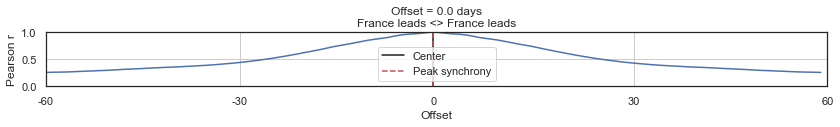

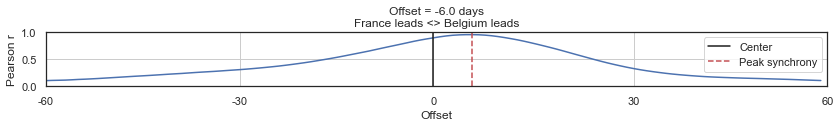

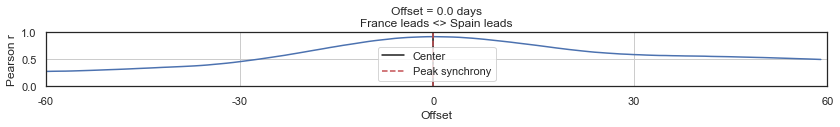

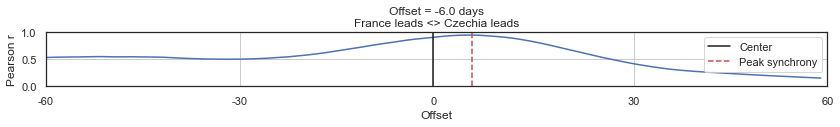

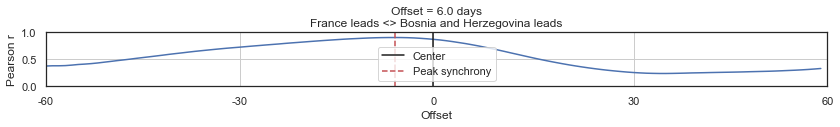

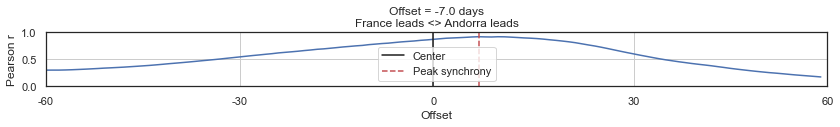

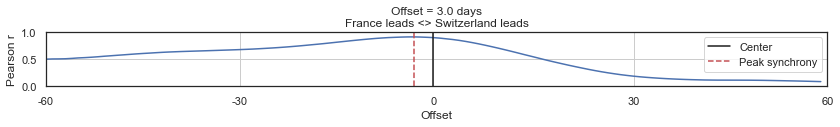

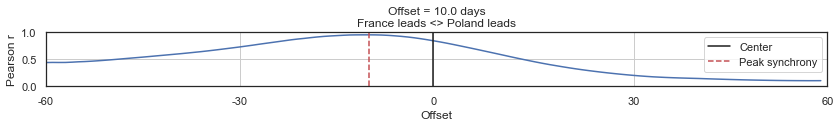

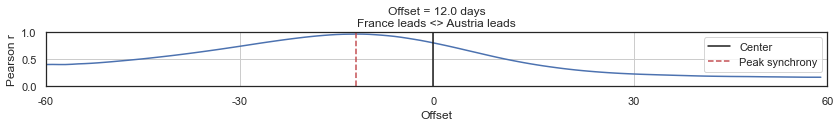

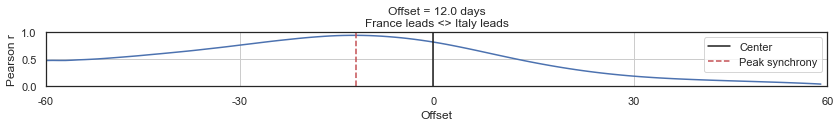

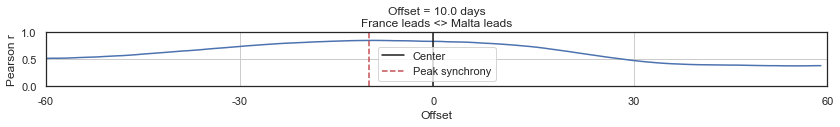

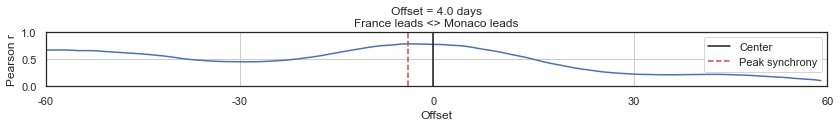

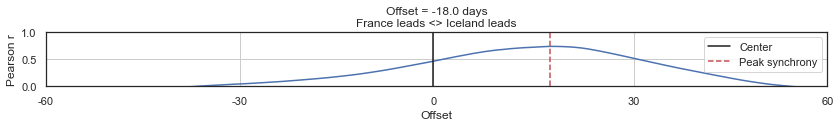

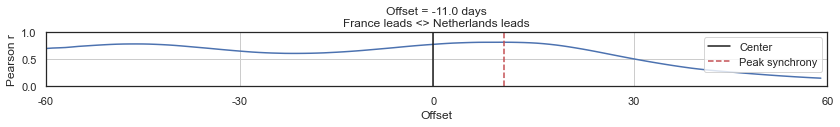

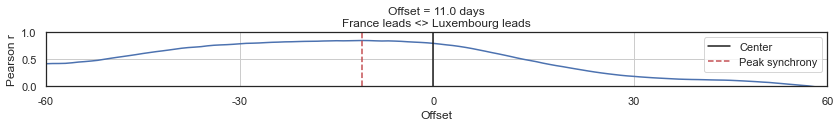

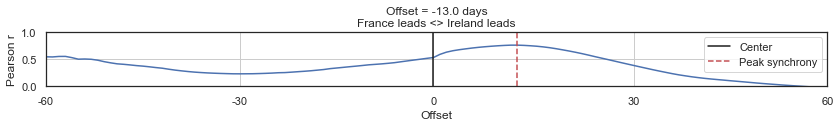

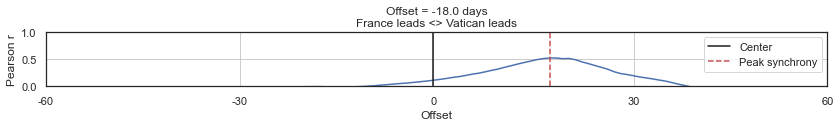

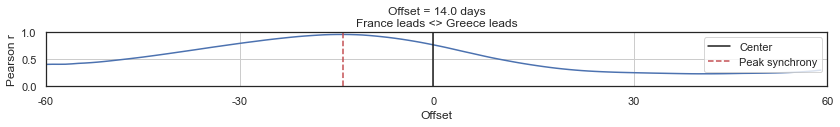

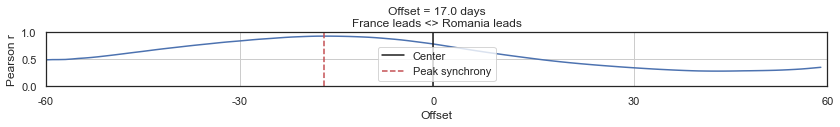

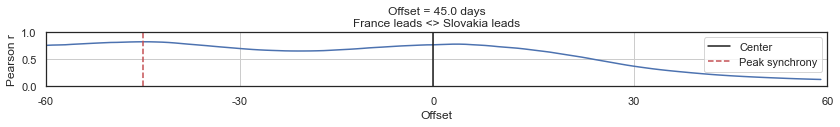

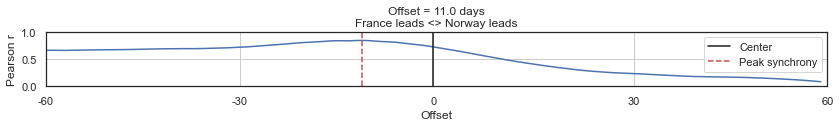

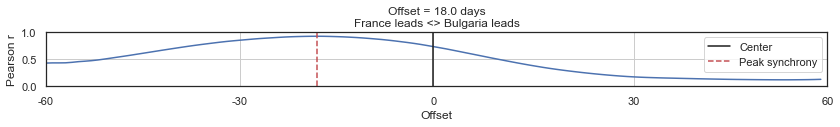

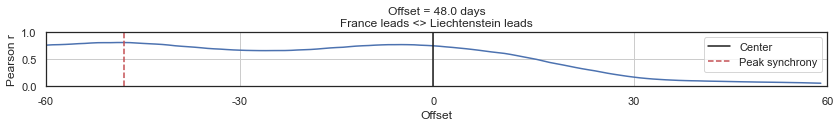

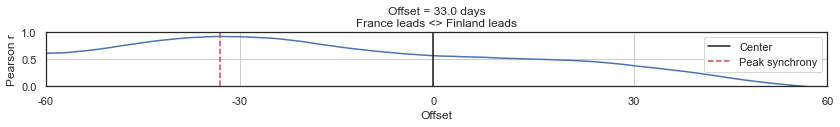

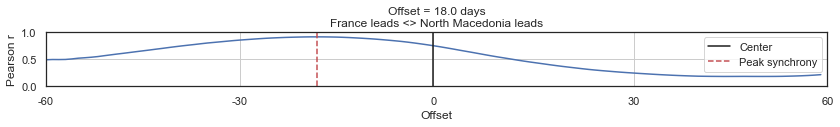

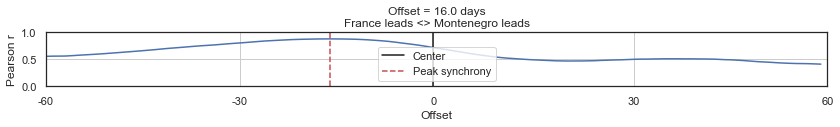

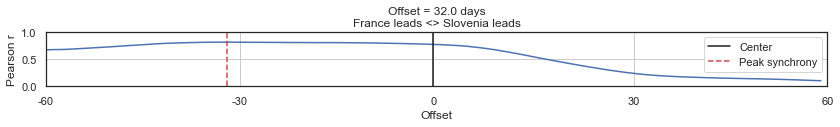

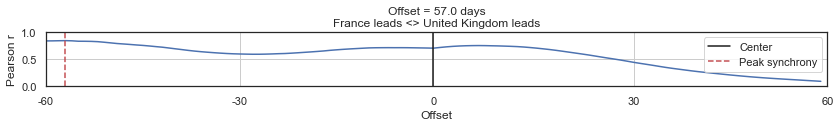

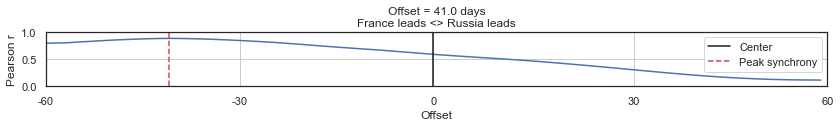

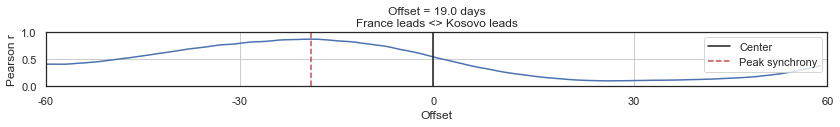

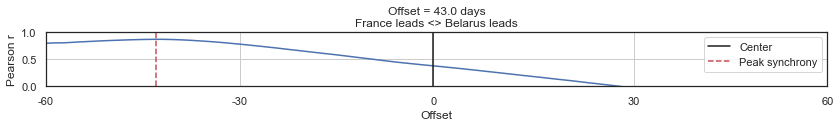

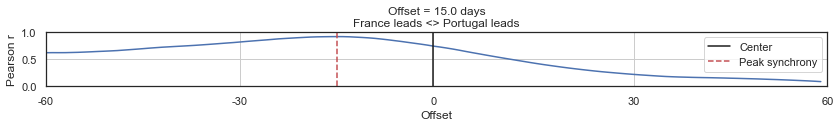

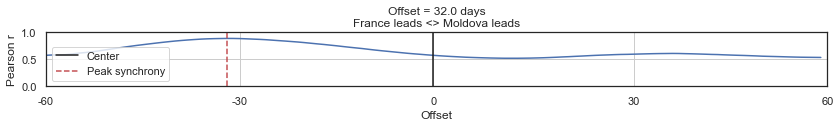

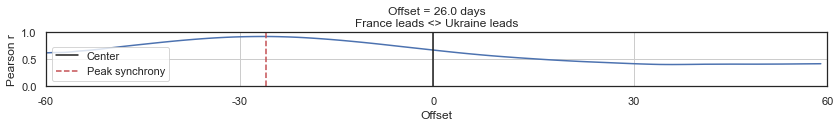

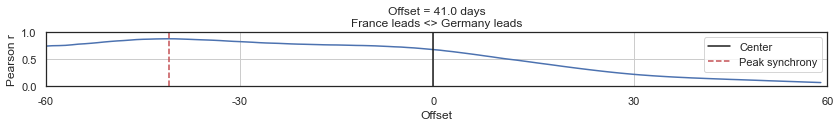

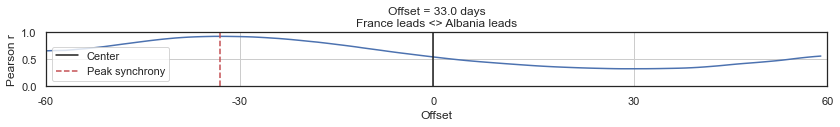

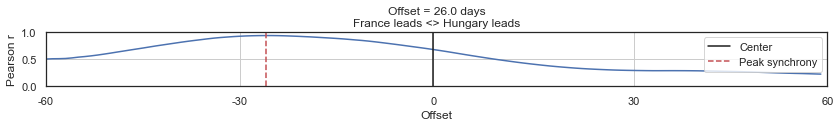

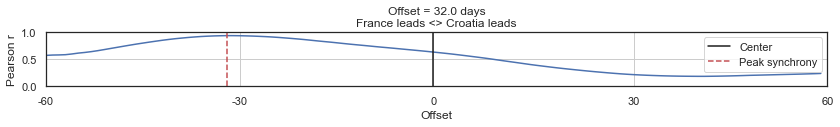

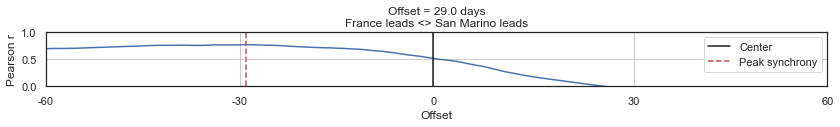

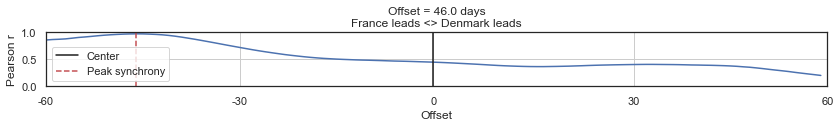

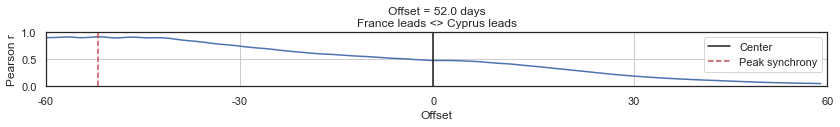

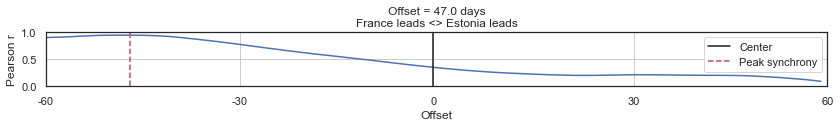

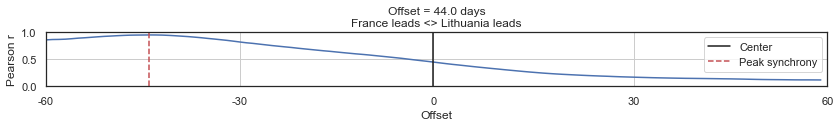

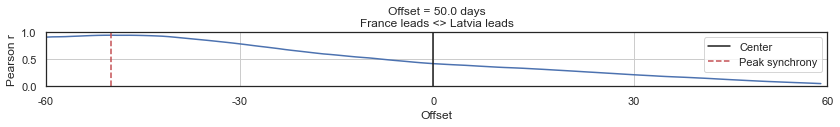

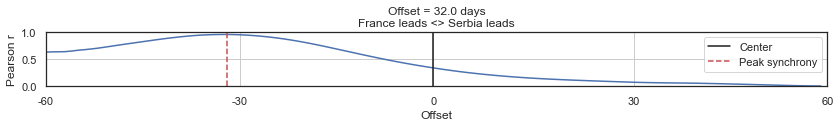

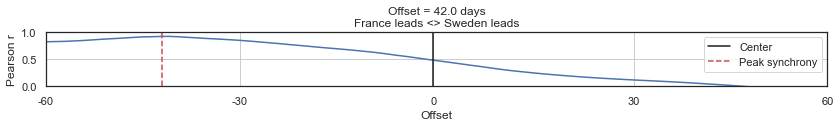

In [95]:
location = 'France'
d1 = data1_cases_loc['new_cases_smoothed_per_million'][location].dropna()
days = 60 # lead lag + & - windows 
plt.rcParams.update({'figure.max_open_warning': 0}) # do not show warnings

# Listed in order of highest to lowest cross-section de-meaned series contemporaneous correlation from the previous correlation matrix

# ['France', 'Belgium', 'Spain', 'Malta', 'Czechia', 'Netherlands',
#        'Andorra', 'Bosnia and Herzegovina', 'Poland', 'Austria', 'Iceland',
#        'Moldova', 'Ukraine', 'Slovakia', 'Ireland', 'Romania',
#        'United Kingdom', 'Greece', 'Italy', 'Monaco', 'Montenegro', 'Hungary',
#        'Albania', 'Luxembourg', 'Finland', 'Vatican', 'Norway', 'Slovenia',
#        'Switzerland', 'Belarus', 'North Macedonia', 'Germany', 'Russia',
#        'Croatia', 'Kosovo', 'Bulgaria', 'Denmark', 'Liechtenstein', 'Portugal',
#        'Estonia', 'San Marino', 'Latvia', 'Cyprus', 'Lithuania', 'Sweden',
#        'Serbia']
offsets_dict = {}
for c in tqdm(data1_case_demean_corr_loc.sort_values(location,ascending=False).index):
    
    d2 = data1_cases_loc.loc[d1.index,'new_cases_smoothed_per_million'][c]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
    offset = np.ceil(len(rs)/2-1)-np.argmax(rs)
    offsets_dict[c] = offset
    f,ax=plt.subplots(figsize=(14,1))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2-1),color='k',linestyle='-',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Offset = {offset} days\n{location} leads <> {c} leads',ylim=[-0,1],xlim=[0,60], xlabel='Offset',ylabel='Pearson r')
    ax.set_xticks([0, 30, 60, 91, 121])
    ax.set_xticklabels([-60, -30, 0, 30, 60]);
    plt.grid()
    plt.legend()

In [38]:
france_offsets = pd.DataFrame(data={'location':offsets_dict.keys(), 'offset_days':offsets_dict.values()}).set_index('location')
# france_offsets['abs_offset_days'] = abs(france_offsets['offset_days'])
# france_offsets.sort_values('abs_offset_days')

offset_days  abs_offset_days
location                                            
France                          0.0              0.0
Spain                           0.0              0.0
Switzerland                     3.0              3.0
Monaco                          4.0              4.0
Belgium                        -6.0              6.0
Czechia                        -6.0              6.0
Bosnia and Herzegovina          6.0              6.0
Malta                           9.0              9.0
Andorra                       -10.0             10.0
Poland                         10.0             10.0
Netherlands                   -11.0             11.0
Luxembourg                     11.0             11.0
Austria                        12.0             12.0
Italy                          12.0             12.0
Ireland                       -13.0             13.0
Greece                         14.0             14.0
Portugal                       15.0             15.0
Norway                         15.0             15.0
Montenegro                     16.0             16.0
Romania                        17.0             17.0
North Macedonia                18.0             18.0
Vatican                       -18.0             18.0
Bulgaria                       18.0             18.0
Iceland                       -19.0             19.0
Kosovo                         19.0             19.0
Hungary                        25.0             25.0
Ukraine                        26.0             26.0
Serbia                         32.0             32.0
Slovenia                       32.0             32.0
Croatia                        32.0             32.0
Moldova                        32.0             32.0
Finland                        33.0             33.0
Albania                        33.0             33.0
San Marino                     40.0             40.0
Russia                         41.0             41.0
Germany                        41.0             41.0
Sweden                         42.0             42.0
Lithuania                      44.0             44.0
Belarus                        44.0             44.0
Slovakia                       45.0             45.0
Denmark                        46.0             46.0
Estonia                        47.0             47.0
Liechtenstein                  48.0             48.0
Latvia                         50.0             50.0
Cyprus                         52.0             52.0
United Kingdom                 57.0             57.0

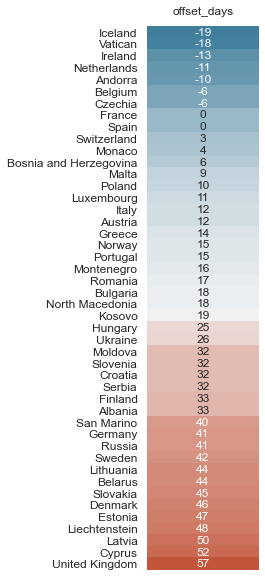

In [41]:
plt.figure(figsize=(2,10))
hm = sns.heatmap(france_offsets[['offset_days']].sort_values('offset_days'), annot=True, cmap=cmap, cbar=False)
hm.set(xlabel=None, ylabel=None)
hm.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

# do lead lag correlations to France in iso codes

100%|██████████| 46/46 [00:05<00:00,  8.83it/s]


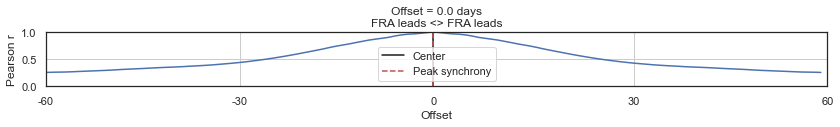

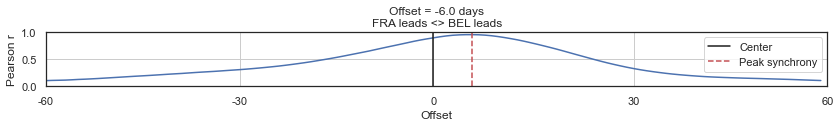

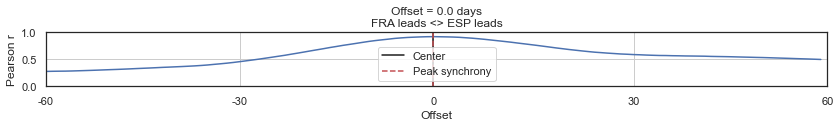

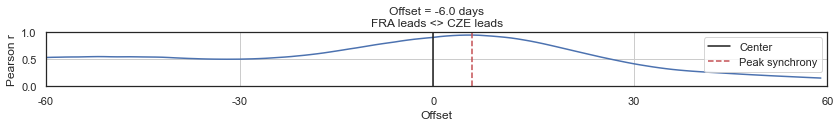

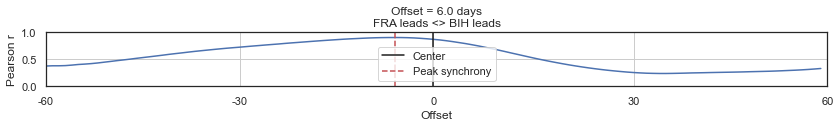

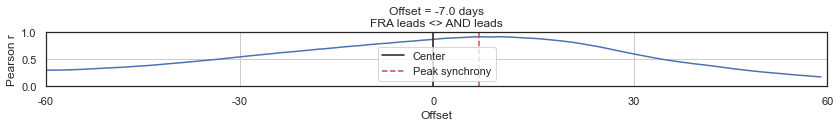

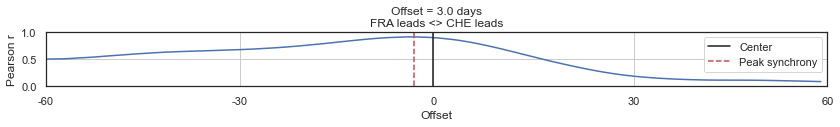

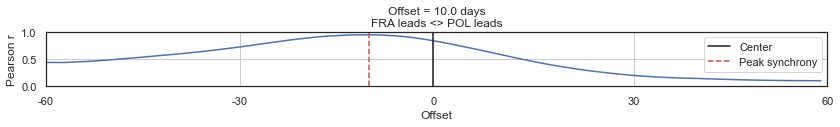

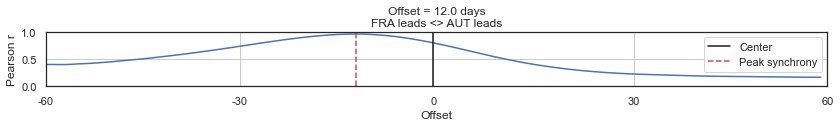

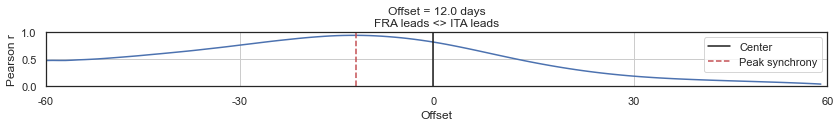

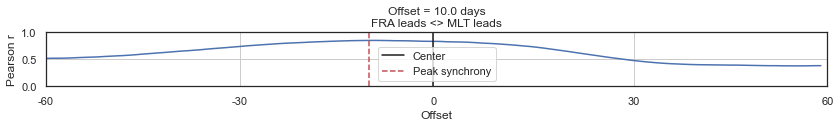

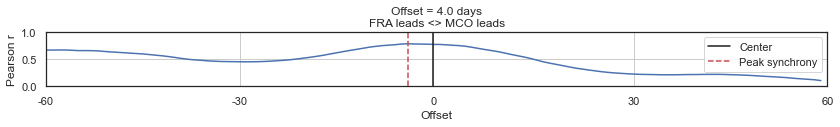

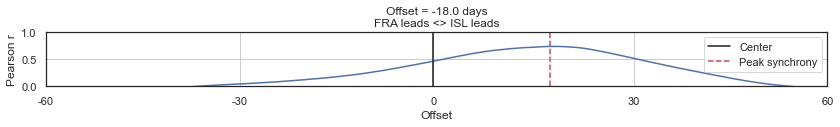

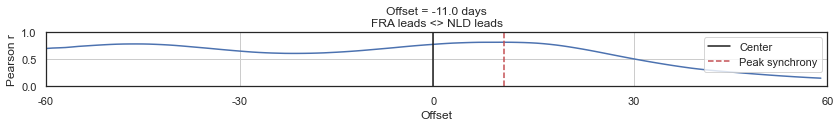

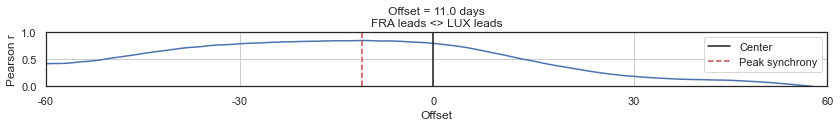

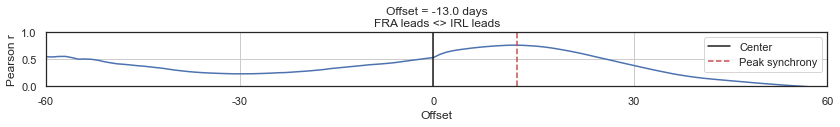

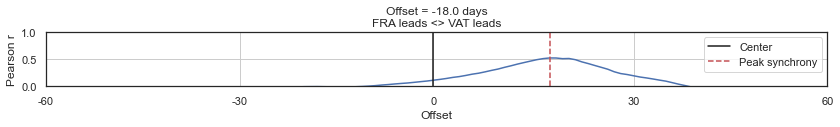

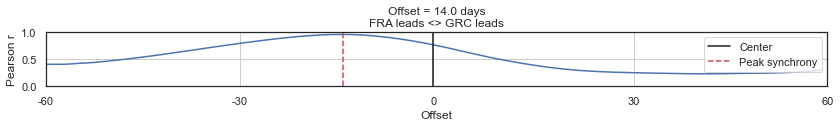

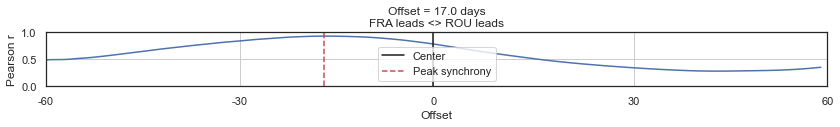

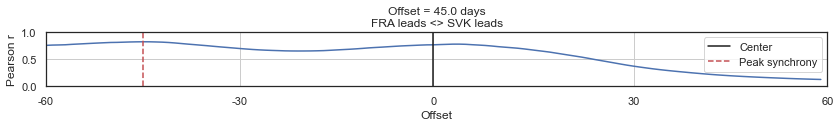

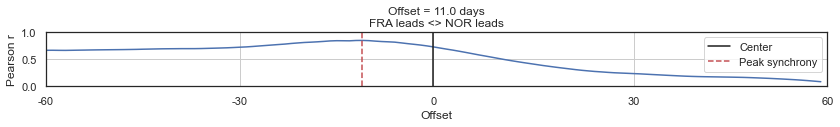

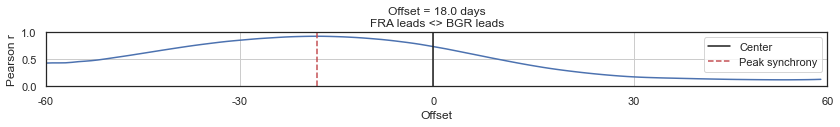

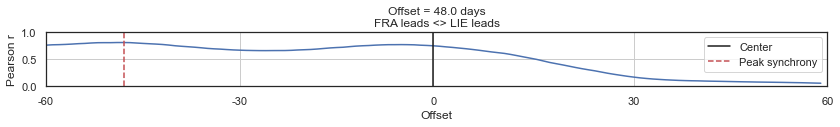

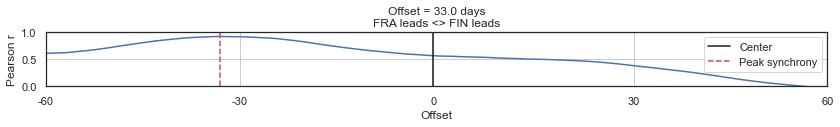

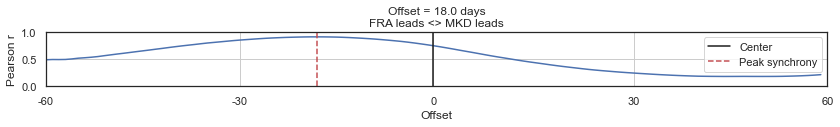

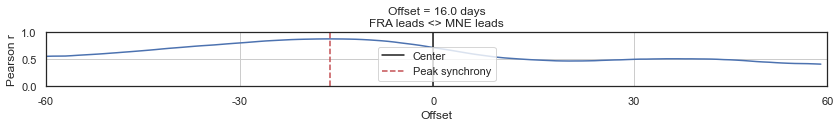

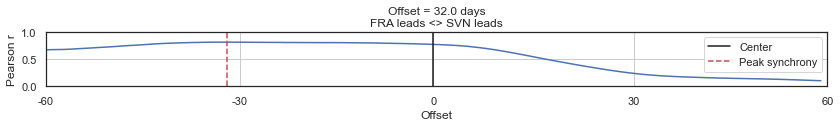

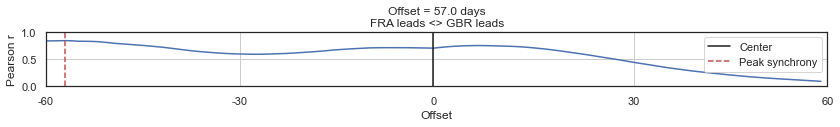

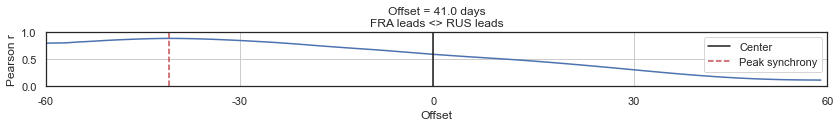

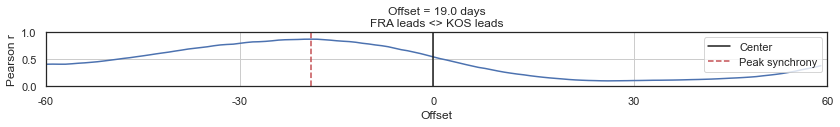

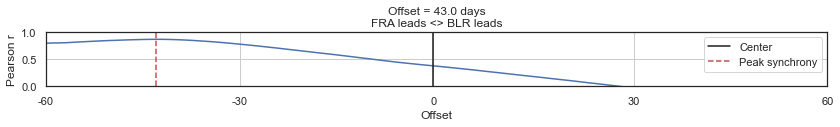

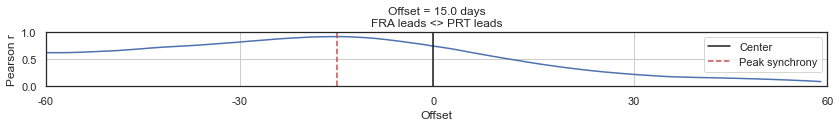

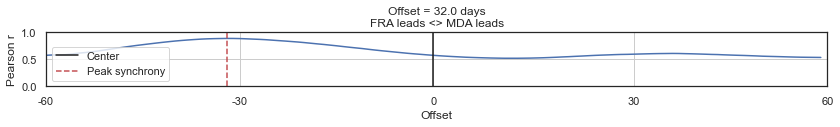

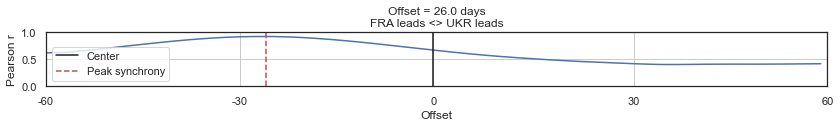

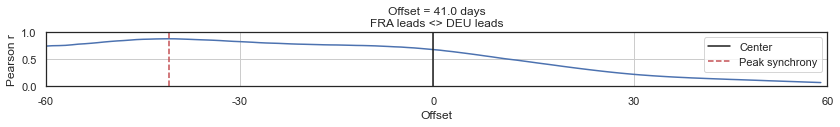

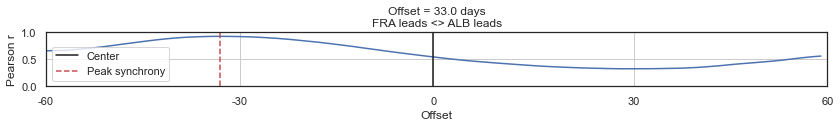

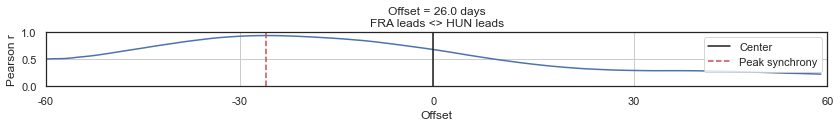

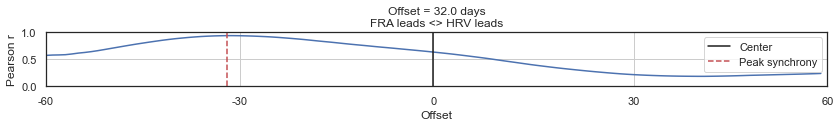

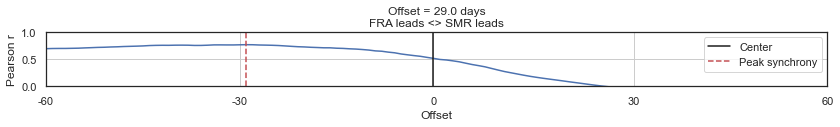

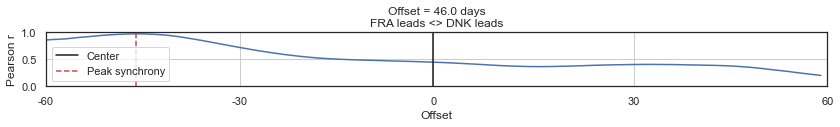

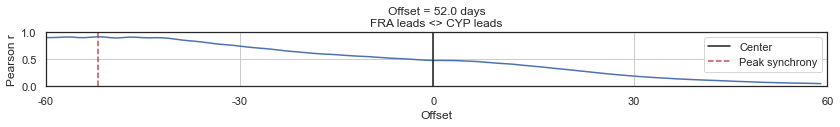

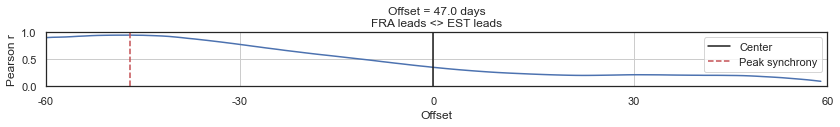

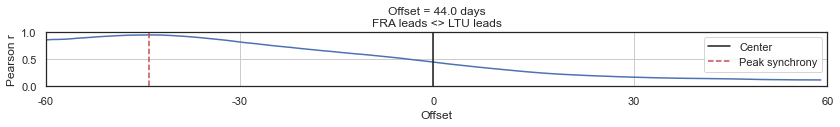

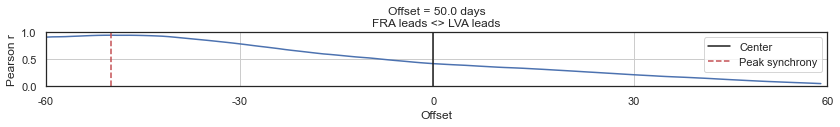

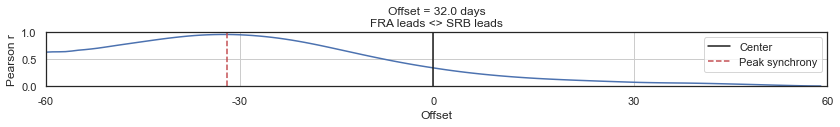

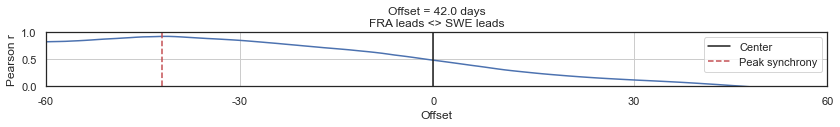

In [97]:
iso = 'FRA'
d1 = data1_cases['new_cases_smoothed_per_million'][iso].dropna()
days = 60 # lead lag + & - windows 
plt.rcParams.update({'figure.max_open_warning': 0}) # do not show warnings

offsets_dict = {}
for c in tqdm(data1_case_demean_corr_iso.sort_values(iso,ascending=False).index):
    
    d2 = data1_cases.loc[d1.index,'new_cases_smoothed_per_million'][c]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
    offset = np.ceil(len(rs)/2-1)-np.argmax(rs)
    offsets_dict[c] = offset
    f,ax=plt.subplots(figsize=(14,1))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2-1),color='k',linestyle='-',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Offset = {offset} days\n{iso} leads <> {c} leads',ylim=[-0,1],xlim=[0,60], xlabel='Offset',ylabel='Pearson r')
    ax.set_xticks([0, 30, 60, 91, 121])
    ax.set_xticklabels([-60, -30, 0, 30, 60]);
    plt.grid()
    plt.legend()

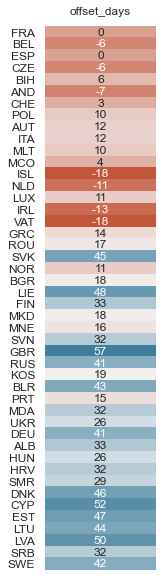

In [98]:
offsets = pd.DataFrame(data={'iso':offsets_dict.keys(), 'offset_days':offsets_dict.values()}).set_index('iso')
plt.figure(figsize=(2,10))
hm = sns.heatmap(offsets[['offset_days']], annot=True, cmap=sns.diverging_palette(20, 230, as_cmap=True), cbar=False)
hm.set(xlabel=None, ylabel=None)
hm.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

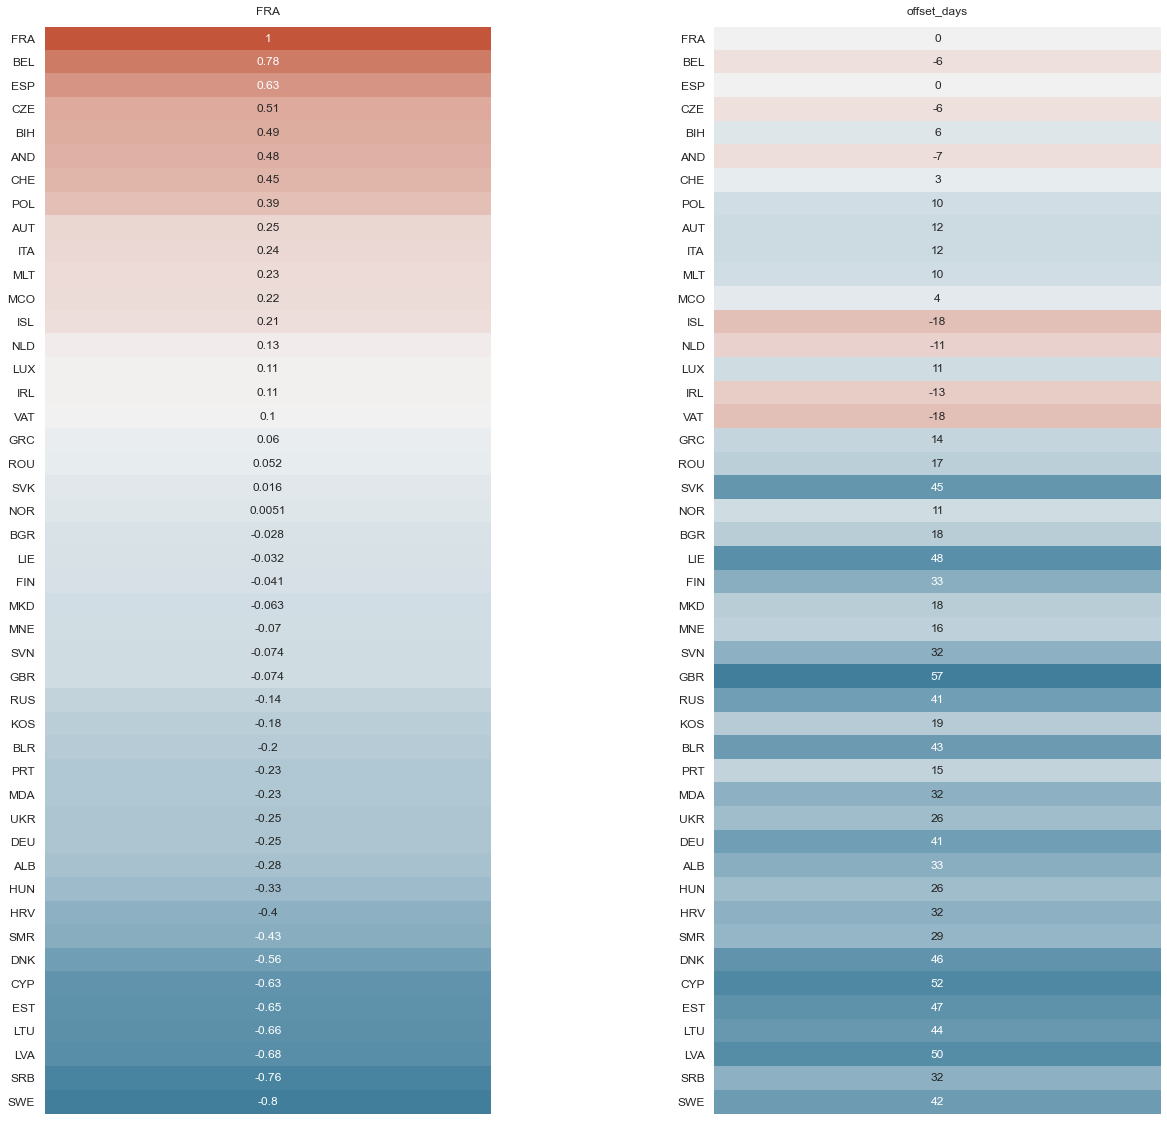

In [99]:
fig, (ax1, ax11) = plt.subplots(1,2, figsize=(20,20))
#fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=0.5)
g1=sns.heatmap(data1_case_demean_corr_iso[['FRA']].sort_values('FRA',ascending=False), annot=True, ax=ax1, cmap=cmap, cbar=False)
g11=sns.heatmap(offsets[['offset_days']], annot=True, ax=ax11, cmap=sns.diverging_palette(20, 230, as_cmap=True), center=0, cbar=False)

g1.set(xlabel=None, ylabel=None)
g11.set(xlabel=None, ylabel=None)

g1.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g11.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

# do lead lag correlations to all countries in iso codes

In [122]:
offsets_df_dict={}
days = 60 # lead lag + & - windows 

for iso in tqdm(iso_codes):
    d1 = data1_cases['new_cases_smoothed_per_million'][iso].dropna()
    offsets_dict = {}
    
    for c in data1_case_demean_corr_iso.sort_values(iso, ascending=False).index:
        d2 = data1_cases.loc[d1.index,'new_cases_smoothed_per_million'][c]
        rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
        offset = np.ceil(len(rs)/2-1)-np.argmax(rs)
        offsets_dict[c] = offset
    #     plt.rcParams.update({'figure.max_open_warning': 0}) # do not show warnings
    #     f,ax=plt.subplots(figsize=(14,1))
    #     ax.plot(rs)
    #     ax.axvline(np.ceil(len(rs)/2-1),color='k',linestyle='-',label='Center')
    #     ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    #     ax.set(title=f'Offset = {offset} days\n{iso} leads <> {c} leads',ylim=[-0,1],xlim=[0,60], xlabel='Offset',ylabel='Pearson r')
    #     ax.set_xticks([0, 30, 60, 91, 121])
    #     ax.set_xticklabels([-60, -30, 0, 30, 60]);
    #     plt.grid()
    #     plt.legend()
    
#     offsets_df_dict[iso] = pd.DataFrame(data={'iso':offsets_dict.keys(), iso + '_offset_days':offsets_dict.values()}).set_index('iso')
    offsets_df_dict[iso] = pd.DataFrame(data={'iso':offsets_dict.keys(), iso:offsets_dict.values()}).set_index('iso')

100%|██████████| 46/46 [02:18<00:00,  3.01s/it]


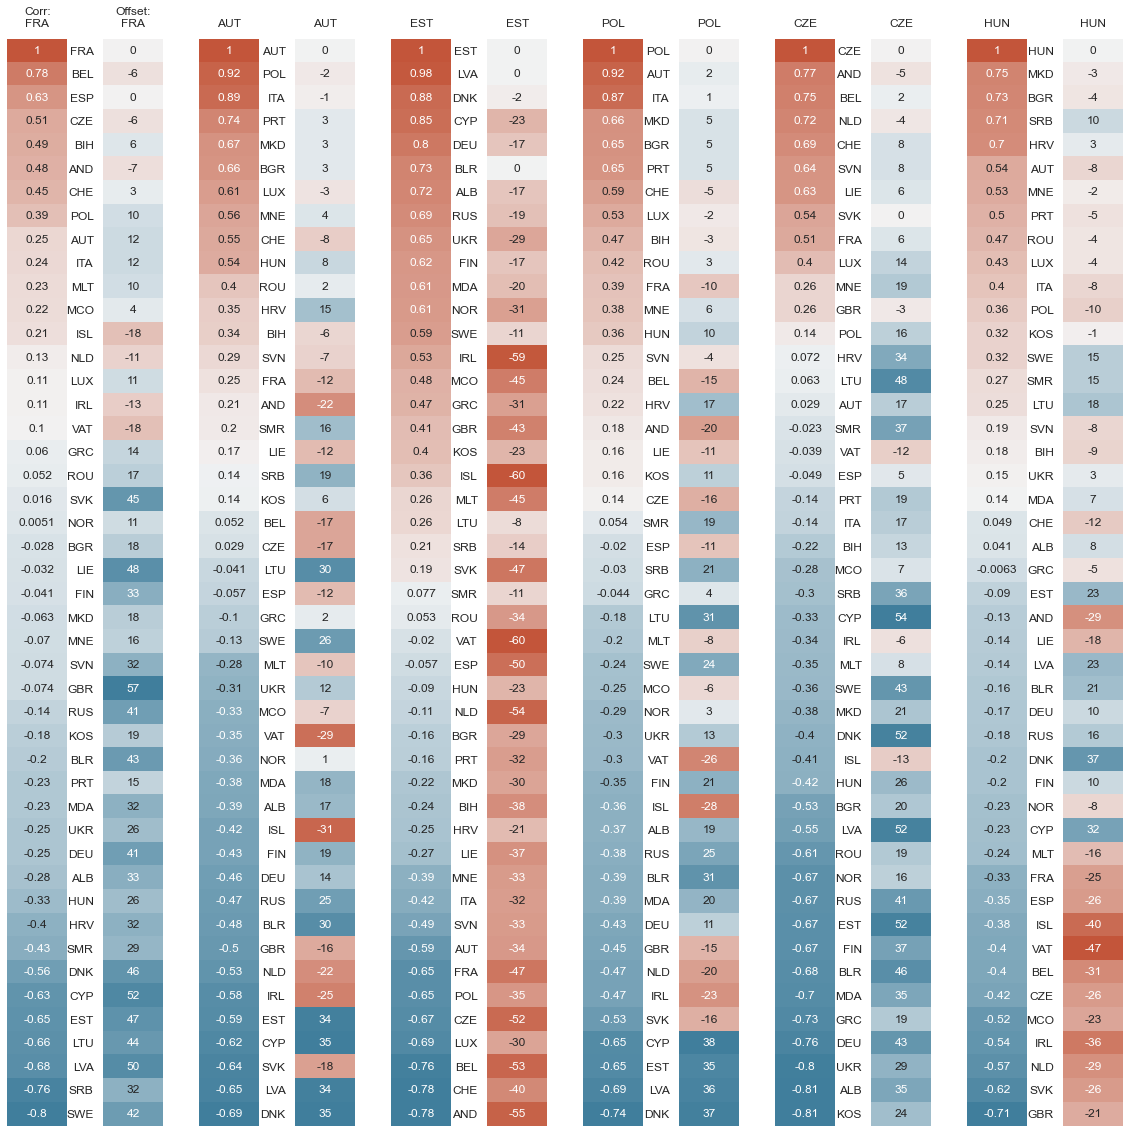

In [123]:
fig, (ax1, ax11, ax2, ax22, ax3, ax33, ax4, ax44, ax5, ax55, ax6, ax66) = plt.subplots(1,12, figsize=(20,20))
#fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=0.6)
cmap2=sns.diverging_palette(20, 230, as_cmap=True)
g1=sns.heatmap(data1_case_demean_corr_iso[['FRA']].sort_values('FRA',ascending=False), annot=True, ax=ax1, cmap=cmap, cbar=False)
g11=sns.heatmap(offsets_df_dict['FRA'], annot=True, cmap=cmap2, ax=ax11, center=0, cbar=False)
g2=sns.heatmap(data1_case_demean_corr_iso[['AUT']].sort_values('AUT',ascending=False), annot=True, ax=ax2, cmap=cmap, cbar=False)
g22=sns.heatmap(offsets_df_dict['AUT'], annot=True, cmap=cmap2, ax=ax22, center=0, cbar=False)
g3=sns.heatmap(data1_case_demean_corr_iso[['EST']].sort_values('EST',ascending=False), annot=True, ax=ax3, cmap=cmap, cbar=False)
g33=sns.heatmap(offsets_df_dict['EST'], annot=True, cmap=cmap2, ax=ax33, center=0, cbar=False)
g4=sns.heatmap(data1_case_demean_corr_iso[['POL']].sort_values('POL',ascending=False), annot=True, ax=ax4, cmap=cmap, cbar=False)
g44=sns.heatmap(offsets_df_dict['POL'], annot=True, cmap=cmap2, ax=ax44, center=0, cbar=False)
g5=sns.heatmap(data1_case_demean_corr_iso[['CZE']].sort_values('CZE',ascending=False), annot=True, ax=ax5, cmap=cmap, cbar=False)
g55=sns.heatmap(offsets_df_dict['CZE'], annot=True, cmap=cmap2, ax=ax55, center=0, cbar=False)
g6=sns.heatmap(data1_case_demean_corr_iso[['HUN']].sort_values('HUN',ascending=False), annot=True, ax=ax6, cmap=cmap, cbar=False)
g66=sns.heatmap(offsets_df_dict['HUN'], annot=True, cmap=cmap2, ax=ax66, center=0, cbar=False)

g1.set(xlabel='Corr:', ylabel=None)
g1.xaxis.set_label_position('top')
g11.set(xlabel='Offset:', ylabel=None)
g11.xaxis.set_label_position('top')
g2.set(xlabel=None, ylabel=None)
g22.set(xlabel=None, ylabel=None)
g3.set(xlabel=None, ylabel=None)
g33.set(xlabel=None, ylabel=None)
g4.set(xlabel=None, ylabel=None)
g44.set(xlabel=None, ylabel=None)
g5.set(xlabel=None, ylabel=None)
g55.set(xlabel=None, ylabel=None)
g6.set(xlabel=None, ylabel=None)
g66.set(xlabel=None, ylabel=None)

g1.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g11.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g2.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g22.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g3.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g33.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g4.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g44.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g5.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g55.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g6.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g66.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()